# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #
from sklearn.model_selection import train_test_split #
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import metrics

# 2. Read the dataset

In [5]:
df = pd.read_csv("tweets.csv")
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


# 3. Split the dataset into X and y

In [6]:
X=df["status"]
y=df["author"]

# 4. Split the dataset into training set and testing set

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.30, random_state=53)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

tfidf = TfidfVectorizer()
count = CountVectorizer()

# Create tfidf train and test variables
Xtrain_tfidf = tfidf.fit_transform(X_train)
Xtest_tfidf = tfidf.transform(X_test)

# Create count train and test variables
Xtrain_count = count.fit_transform(X_train)
Xtest_count = count.transform(X_test)

Xtrain_tfidf.shape


(280, 2047)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [12]:
log_tfidf = LogisticRegression()
log_count = LogisticRegression()

log_tfidf.fit(Xtrain_tfidf, y_train)
log_count.fit(Xtrain_count, y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [13]:
SVMtfidf = SVC()
SVMcount = SVC()

SVMtfidf.fit(Xtrain_tfidf, y_train)
SVMcount.fit(Xtrain_count, y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

Logistic Regression

In [15]:
log_tfidf_pred = log_tfidf.predict(Xtest_tfidf)
log_count_pred = log_count.predict(Xtest_count)


In [16]:
score_logreg_tfidf = accuracy_score(y_test, log_tfidf_pred)
score_logreg_count = accuracy_score(y_test, log_count_pred)

In [18]:
print("Logistic Regression Score Tfidf: " , score_logreg_tfidf)
print("Logistic Regression Score count: " , score_logreg_count)


Logistic Regression Score Tfidf:  0.8583333333333333
Logistic Regression Score count:  0.875


SVM

In [20]:
svm_tfidf_pred = SVMtfidf.predict(Xtest_tfidf)
svm_count_pred = SVMcount.predict(Xtest_count)

In [21]:
score_svm_tfidf = accuracy_score(y_test, svm_tfidf_pred)
score_svm_count = accuracy_score(y_test, svm_count_pred)

In [22]:
print("SVM Score Tfidf: " , score_svm_tfidf)
print("SVM Score count: " , score_svm_count)

SVM Score Tfidf:  0.8833333333333333
SVM Score count:  0.85


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [25]:
cm_log_tfidf = confusion_matrix(y_test, log_tfidf_pred)
cm_log_count = confusion_matrix(y_test, log_count_pred)
cm_svm_tfidf = confusion_matrix(y_test, svm_tfidf_pred)
cm_svm_count = confusion_matrix(y_test, svm_count_pred)

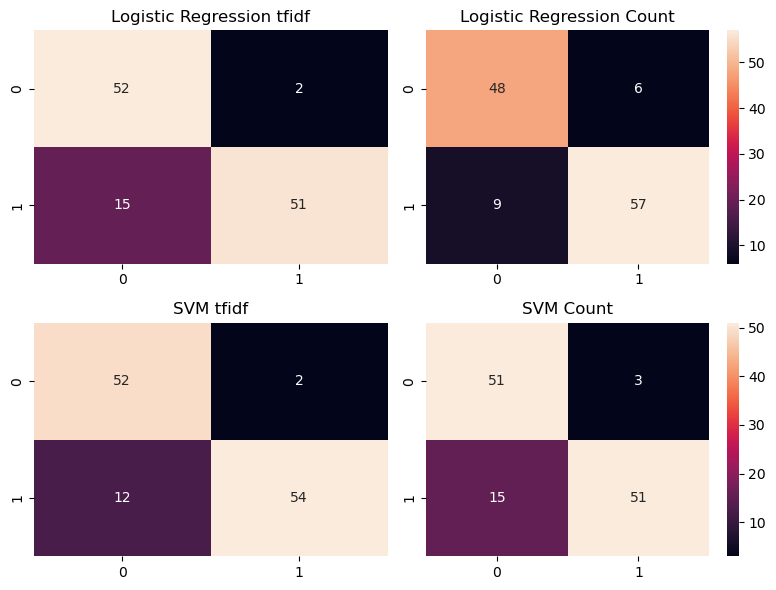

In [30]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.heatmap(cm_log_tfidf, annot=True, cbar = False)
plt.title('Logistic Regression tfidf')

plt.subplot(2, 2, 2)
sns.heatmap(cm_log_count, annot = True)
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 3)
sns.heatmap(cm_svm_tfidf, annot = True, cbar = False)
plt.title('SVM tfidf')

plt.subplot(2, 2, 4)
sns.heatmap(cm_svm_count, annot = True)
plt.title('SVM Count')

plt.tight_layout()
plt.show()